In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
%matplotlib inline

# 1. Create two python dictionaries to store your data


In [2]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
colNames = ['typeEarning',
'Total',
'1-2,499 or loss',
'2,500-4,999',
'5,000-7,499',
'7,500-9,999',
'10,000-12,499',
'12,500-14,999',
'15,000-17,499',
'17,500-19,999',
'20,000-22,499',
'22,500-24,999',
'25,000-27,499',
'27,500-29,999',
'30,000-32,499',
'32,500-34,999',
'35,000-37,499',
'37,500-39,999',
'40,000-42,499',
'42,500-44,999',
'45,000-47,499',
'47,500-49,999',
'50,000-52,499',
'52,500-54,999',
'55,000-57,499',
'57,500-59,999',
'60,000-62,499',
'62,500-64,999',
'65,000-67,499',
'67,500-69,999',
'70,000-72,499',
'72,500-74,999',
'75,000-77,499',
'77,500-79,999',
'80,000-82,499',
'82,500-84,999',
'85,000-87,499',
'87,500-89,999',
'90,000-92,499',
'92,500-94,999',
'95,000-97,499',
'97,500-99,999',
'100,000-over',
'MedianIncome',
'MedianIncomeStd',
'MeanIncome',
'MeanIncomeStd',
'Gini',
'GiniStd'
]



allmales = {'all': pd.read_excel(url + 'pinc08_2_1_1.xls',skiprows = 10,names = colNames),
            'white':pd.read_excel(url + 'pinc08_2_1_4.xls',skiprows = 10,names = colNames),
            'black':pd.read_excel(url + 'pinc08_2_1_6.xls',skiprows = 10,names = colNames),
            'hispanic':pd.read_excel(url + 'pinc08_2_1_9.xls',skiprows = 10,names = colNames),
            'asian':pd.read_excel(url + 'pinc08_2_1_8.xls',skiprows = 10,names = colNames)}

allfemales = {'all': pd.read_excel(url + 'pinc08_3_1_1.xls',skiprows = 10,names = colNames),
            'white':pd.read_excel(url + 'pinc08_3_1_4.xls',skiprows = 10,names = colNames),
            'black':pd.read_excel(url + 'pinc08_3_1_6.xls',skiprows = 10,names = colNames),
            'hispanic':pd.read_excel(url + 'pinc08_3_1_9.xls',skiprows = 10,names = colNames),
            'asian':pd.read_excel(url + 'pinc08_3_1_8.xls',skiprows = 10,names = colNames)}




In [3]:
allfemales['asian'].head()

,typeEarning,Total,"1-2,499 or loss","2,500-4,999","5,000-7,499","7,500-9,999","10,000-12,499","12,500-14,999","15,000-17,499","17,500-19,999",...,"92,500-94,999","95,000-97,499","97,500-99,999","100,000-over",MedianIncome,MedianIncomeStd,MeanIncome,MeanIncomeStd,Gini,GiniStd
0,....Total,5648.0,521.0,224.0,353.0,348.0,342.0,203.0,241.0,182.0,...,6.0,20.0,6.0,414.0,24840,888,36684,1111,0.533,0.0092
1,Earnings,4064.0,154.0,147.0,176.0,133.0,202.0,82.0,187.0,157.0,...,8.0,22.0,5.0,374.0,31363,555,43771,1439,0.478,0.0113
2,..Wages and Salary,3861.0,135.0,147.0,167.0,116.0,174.0,73.0,176.0,147.0,...,8.0,22.0,5.0,362.0,31802,614,44515,1502,0.474,0.0116
3,..Nonfarm Self-Employment,280.0,55.0,2.0,17.0,22.0,36.0,6.0,18.0,9.0,...,0.0,0.0,0.0,8.0,15231,2911,21155,2495,0.543,0.039
4,..Farm Self-Employment,28.0,22.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,(B),(B),(B),(B),(B),(B)


# 2. Exploratory phase

In [4]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


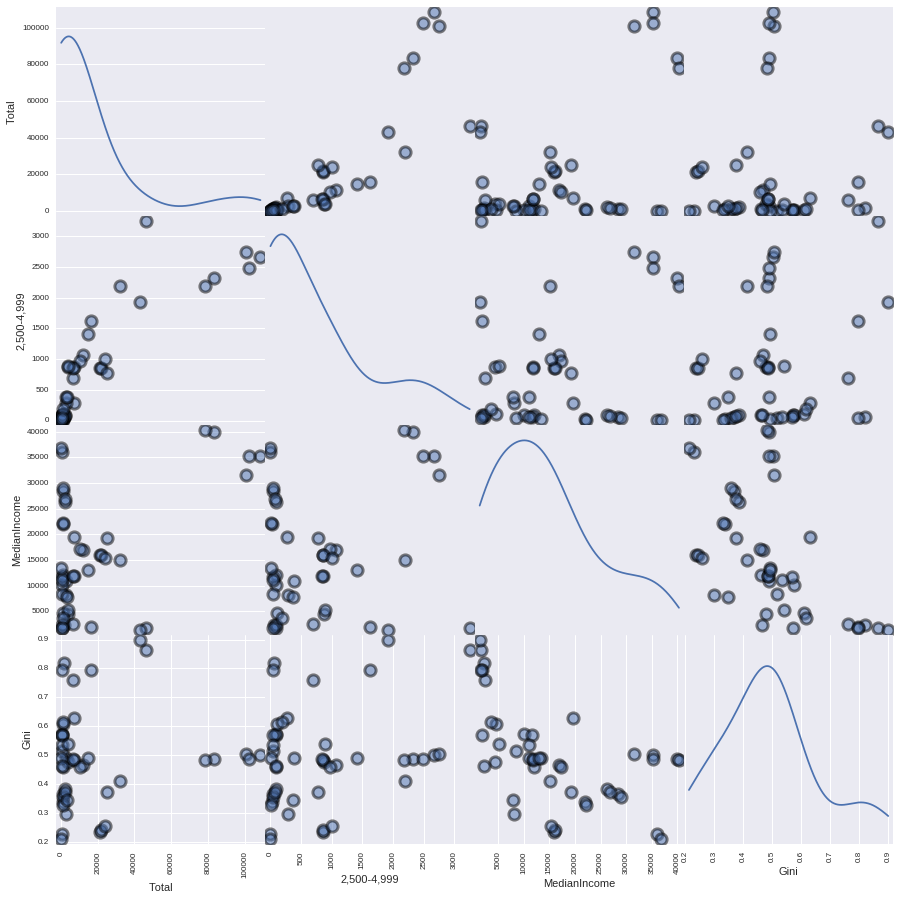

In [5]:
fig = pd.scatter_matrix(allmales['all']
                   [['Total','2,500-4,999',
                     'MedianIncome','Gini']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')   

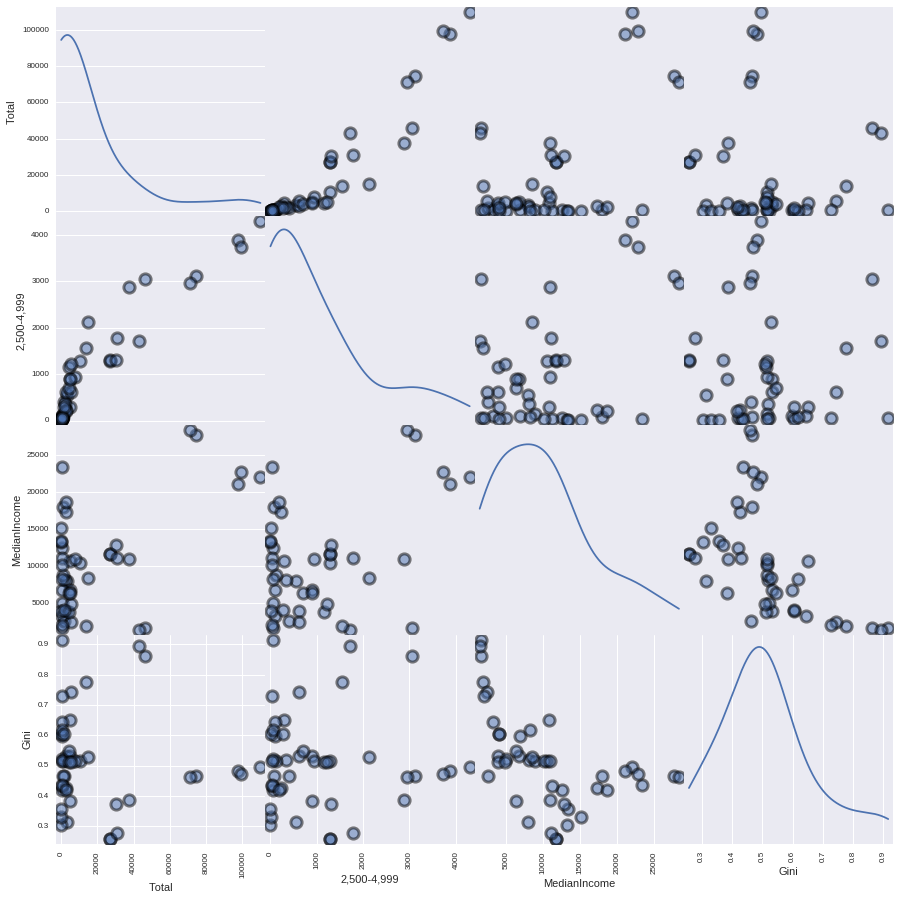

In [6]:
fig = pd.scatter_matrix(allfemales['all']
                   [['Total','2,500-4,999',
                     'MedianIncome','Gini']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')   

# 3. Relation between male and female median income 

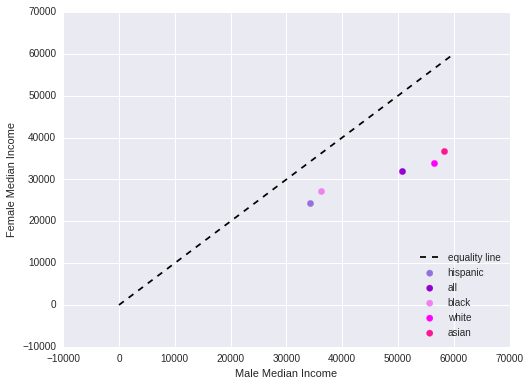

In [10]:
#store values in lists
maleIncomes = []
femaleIncomes = []
races = []
colors = ['mediumpurple','darkviolet','violet','magenta','deeppink']


for race in allfemales.keys():
    meanIncomeMale = allmales[race]['MeanIncome'][0]
    meanIncomeFemale = allfemales[race]['MeanIncome'][0]
    races.append(race)
    maleIncomes.append(meanIncomeMale)
    femaleIncomes.append(meanIncomeFemale)

#start plotting

## Figure 1
No mattering the race, male median income is higher than female median income. This is graphically expressed by the fact that every point is located below and to the right of the equality line. If incomes were the same between gender, those points should be distributed around the equality line. Some of them could be bellow and to the right, may be because of stochastic fluctuations. But this would imply, also, that some of the points should be located up and to the left of that line.

# 4. Models 

In [13]:
#ols without intercept
lm = sm.OLS(femaleIncomes,maleIncomes).fit()
lm.params

array([ 0.64463952])

In [14]:
xWithConst = sm.add_constant(maleIncomes)
lmInter = sm.OLS(femaleIncomes,xWithConst).fit()
lmInter.params

array([  1.02850831e+04,   4.36033303e-01])

In [15]:
#analytical best regression line. 
from scipy import stats
all_males=np.array([0., allmales['all']['MeanIncome'][0],
                    allmales['white']['MeanIncome'][0],
                    allmales['black']['MeanIncome'][0],
                     allmales['hispanic']['MeanIncome'][0],
                    allmales['asian']['MeanIncome'][0]])

all_females=np.array([0.] + [allfemales[k]['MeanIncome'][0] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(1539.8485818019908, 0.61503465991101358)

In [16]:
print 'PARAMETERS'
print 'Analytical regression:', beta0, beta1
print 'Statsmodels fit:', lm.params
print 'Statsmodels fit with incercept:', lmInter.params

PARAMETERS
Analytical regression: 1539.8485818 0.615034659911
Statsmodels fit: [ 0.64463952]
Statsmodels fit with incercept: [  1.02850831e+04   4.36033303e-01]


In [17]:
incomes = np.linspace(0,60000,100)
incomesFitedModel = incomes * lm.params[0]
incomesFitedModelInter = lmInter.params[0] + incomes * lmInter.params[1]
incomesFitedAnalytical = beta0 + incomes * beta1 


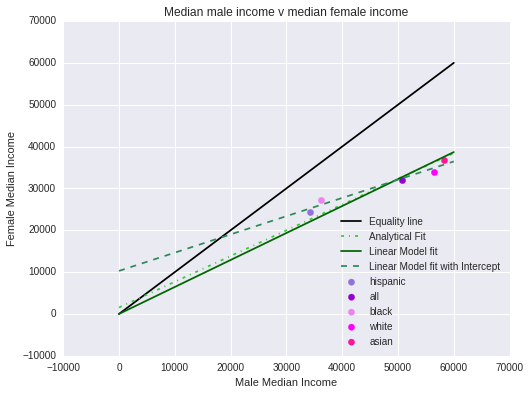

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1) 

#lines
ax.plot([0,60000], [0,60000],'-',color='black', label = 'Equality line')
ax.plot(incomes,incomesFitedAnalytical, '-.', color = 'limegreen', label = 'Analytical Fit')
ax.plot(incomes,incomesFitedModel, '-', color = 'darkgreen', label = 'Linear Model fit')
ax.plot(incomes,incomesFitedModelInter, '--', color = 'seagreen', label = 'Linear Model fit with Intercept')

#mean incomes
i = 0
while i <= 4:
    ax.scatter(maleIncomes[i],femaleIncomes[i], color = colors[i], s=40, label = races[i])
    i += 1

#title and lables
ax.set_xlabel('Male Median Income')
ax.set_ylabel('Female Median Income')
ax.set_title('Median male income v median female income')
ax.legend(loc=4)

## Figure 2
In the figure displayed above, the lines show the expected income for a woman (under the current conditions) given a certain male income. The difference between the lines is based on the model underlying this projection. The *Linear model fit* doesn't takes into account a intercep parameter (wich would account for the median income of females when the median income of males is 0), while the *Linear model fit with the Intercept* does so. The *Analytical fit* line produces a very low intercept parameter, but eventually the difference in the slope coefficient compensates for this, and both lines tend to converge. Under the current conditions, it would make more sense to use those models with non existing or lower intercept parameters. If the available data shows that females have a lower median income, there is no reason to assume that as male income decreases, female income will tend to catch up and eventually overmatch it.

# 5. Analysis for all incomes sources

In [22]:
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['MedianIncome'][:].values \
                    for k in races]).flatten())
all_males_allincomes = np.array(
    np.concatenate([allmales[k]['MedianIncome'][:].values \
                    for k in races]).flatten())

#create boolean vector
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))


In [23]:
#analytical
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1AllIncomes = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0AllIncomes = all_females_allincomes[mask].mean() - beta1AllIncomes * all_males_allincomes[mask].mean()
beta0AllIncomes, beta1AllIncomes


(1293.7640487731387, 0.62234483903975324)

In [25]:
lmAll = sm.OLS(all_females_allincomes[mask], all_males_allincomes[mask]).fit()
lmAll.params[0]

0.67142838045274678

In [28]:
allMaleIncomesWithInt = sm.add_constant(all_males_allincomes[mask])
lmAllInter = sm.OLS(all_females_allincomes[mask], allMaleIncomesWithInt).fit()
lmAllInter.params

array([  1.49303944e+03,   6.09020524e-01])

In [29]:
#incomesFitedModel = lm.params[0] + incomes * lm.params[1]
incomesAllFitedAnalytical = beta0AllIncomes + incomes * beta1AllIncomes 
incomesAllFitedModel = incomes * lmAll.params[0]
incomesAllFitedModelInter = lmAllInter.params[0] + incomes * lmInter.params[1]


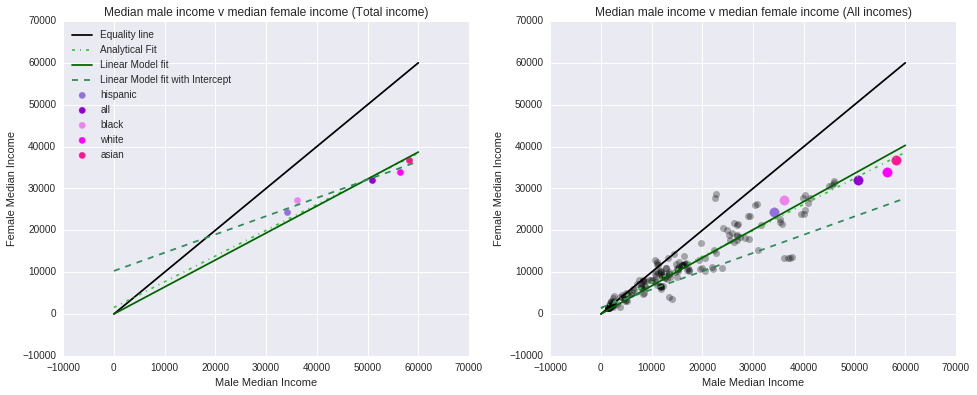

In [41]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(1,2,1) 

#lines
ax.plot([0,60000], [0,60000],'-',color='black', label = 'Equality line')
ax.plot(incomes,incomesFitedAnalytical, '-.', color = 'limegreen', label = 'Analytical Fit')
ax.plot(incomes,incomesFitedModel, '-', color = 'darkgreen', label = 'Linear Model fit')
ax.plot(incomes,incomesFitedModelInter, '--', color = 'seagreen', label = 'Linear Model fit with Intercept')

#mean incomes
i = 0
while i <= 4:
    ax.scatter(maleIncomes[i],femaleIncomes[i], color = colors[i], s=40, label = races[i])
    i += 1

#title and lables
ax.set_xlabel('Male Median Income')
ax.set_ylabel('Female Median Income')
ax.set_title('Median male income v median female income (Total income)')
ax.legend(loc=2)




ax2 = fig.add_subplot(1,2,2) 

#lines
ax2.plot(all_males_allincomes,all_females_allincomes,'ko',alpha=.3)
ax2.plot([0,60000], [0,60000],'-',color='black', label = 'Equality line')
ax2.plot(incomes,incomesAllFitedAnalytical, '-.', color = 'limegreen', label = 'Analytical Fit')
ax2.plot(incomes,incomesAllFitedModel, '-', color = 'darkgreen', label = 'Linear Model fit')
ax2.plot(incomes,incomesAllFitedModelInter, '--', color = 'seagreen', label = 'Linear Model fit with Intercept')

#mean incomes
i = 0
while i <= 4:
    ax2.scatter(maleIncomes[i],femaleIncomes[i], color = colors[i], s=90, label = races[i])
    i += 1

#title and lables
ax2.set_xlabel('Male Median Income')
ax2.set_ylabel('Female Median Income')
ax2.set_title('Median male income v median female income (All incomes)')



## Figure 3
This figure shows that, as the model now takes into account all the sources of income, the intercept parameter is closer to zero. Nevertheless, the slope coefficient in this model is not the best one. There are a couple of points that could be working as high leverage: those incomes particularly high in the male median income and, at the same time, particularly low in the female median income (close to $ 40,000 in male and bearly above $ 10,000 in female) and viceversa (close to \$ 30,000 in female and bearly above \$ 20,000 in male). 



# 6. Projection

In [42]:
projMaleIncome = 40000
projFemaleIncomeAnaly = beta0AllIncomes + projMaleIncome * beta1AllIncomes 
projFemaleIncomeModel = projMaleIncome * lmAll.params[0]
projFemaleIncomeModelInter = lmAllInter.params[0] + projMaleIncome * lmInter.params[1]


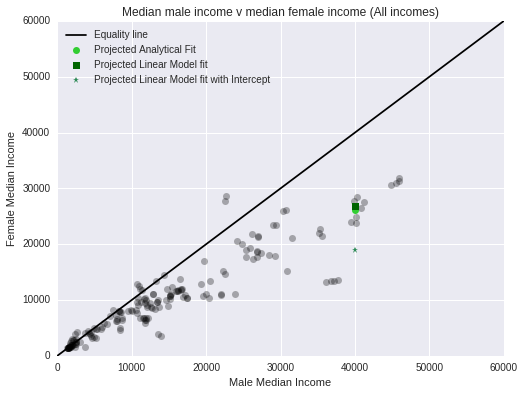

In [54]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.plot(all_males_allincomes,all_females_allincomes,'ko',alpha=.3)
ax.plot([0,60000], [0,60000],'-',color='black', label = 'Equality line')
ax.plot(projMaleIncome,projFemaleIncomeAnaly, 'o', color = 'limegreen', label = 'Projected Analytical Fit')
ax.plot(projMaleIncome,projFemaleIncomeModel, 's', color = 'darkgreen', label = 'Projected Linear Model fit')
ax.plot(projMaleIncome,projFemaleIncomeModelInter, '*', color = 'seagreen', label = 'Projected Linear Model fit with Intercept')

#mean incomes
#i = 0
#while i <= 4:
#    ax2.scatter(maleIncomes[i],femaleIncomes[i], color = colors[i], s=90, label = races[i])
#    i += 1

#title and lables
ax.set_xlabel('Male Median Income')
ax.set_ylabel('Female Median Income')
ax.set_title('Median male income v median female income (All incomes)')
ax.legend(loc=2)

In [58]:
print 'Projection with Analytical model: $ %d' % projFemaleIncomeAnaly 
print 'Projection with Linear model fit: $ %d' % projFemaleIncomeModel
print 'Projection with Linear model fit with an intercept: $ %d' %projFemaleIncomeModelInter

Projection with Analytical model: $ 26187
Projection with Linear model fit: $ 26857
Projection with Linear model fit with an intercept: $ 18934


## Figure 4
As the plot shows, for every man recieving  \$ 40,000, under the current conditions, a woman is expected to receive nearly \$ 26000. 

# 7. Racial component analysis




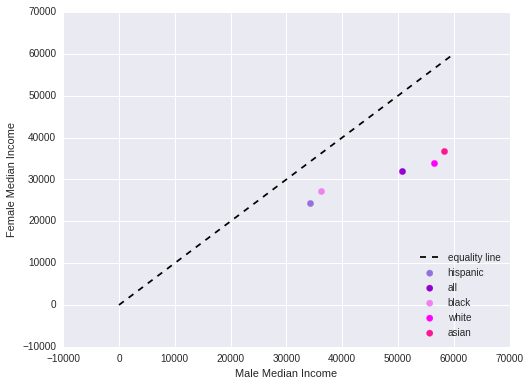

In [55]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1) 
ax.plot([0,60000], [0,60000], 'k--', label = 'equality line')

i = 0
while i <= 4:
    ax.scatter(maleIncomes[i],femaleIncomes[i], color = colors[i], s=40, label = races[i])
    i += 1

ax.set_xlabel('Male Median Income')
ax.set_ylabel('Female Median Income')
ax.legend(loc=4)

## Figure 5
As the plot shows, hispanic and black are the races with the lowest median income, with asian and white being the ones with the highest (in that order). Nevertheless, within all races, males earn more than females. The points for *hispanic* and *black* are closer to the line of equallity, while the races with highest incomes (*asian* and *white*) are farther away. In absolute terms, it could be said that the difference between males and females is bigger between *asian* and *white* than between *black* and *hispanic*.  

In [62]:
maleIncomes

[34176.0, 50779.0, 36117.0, 56368.0, 58236.0]

In [60]:
races

['hispanic', 'all', 'black', 'white', 'asian']

In [70]:
allmales['asian']

,typeEarning,Total,"1-2,499 or loss","2,500-4,999","5,000-7,499","7,500-9,999","10,000-12,499","12,500-14,999","15,000-17,499","17,500-19,999",...,"92,500-94,999","95,000-97,499","97,500-99,999","100,000-over",MedianIncome,MedianIncomeStd,MeanIncome,MeanIncomeStd,Gini,GiniStd
0,....Total,5752.0,230.0,146.0,227.0,195.0,216.0,193.0,225.0,218.0,...,32.0,40.0,23.0,904.0,40153.0,1469.0,58236.0,1786.0,0.519,0.0110
1,Earnings,4716.0,137.0,135.0,132.0,82.0,136.0,109.0,157.0,122.0,...,28.0,28.0,21.0,843.0,45926.0,1619.0,63799.0,2008.0,0.490,0.0119
2,..Wages and Salary,4482.0,126.0,124.0,129.0,83.0,127.0,104.0,145.0,113.0,...,28.0,28.0,20.0,819.0,45950.0,1927.0,64304.0,2042.0,0.490,0.0124
3,..Nonfarm Self-Employment,303.0,58.0,13.0,11.0,2.0,12.0,4.0,16.0,5.0,...,0.0,0.0,0.0,24.0,30916.0,5465.0,41394.0,6079.0,0.571,0.0433
4,..Farm Self-Employment,43.0,32.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Social Security,659.0,6.0,31.0,44.0,77.0,102.0,63.0,93.0,89.0,...,0.0,0.0,0.0,0.0,15120.0,735.0,15189.0,471.0,0.253,0.0120
6,SSI (Supplemental Security Income),106.0,1.0,13.0,20.0,44.0,9.0,8.0,0.0,4.0,...,0.0,0.0,0.0,0.0,8598.0,412.0,9481.0,796.0,0.260,0.0314
7,Public Assistance,29.0,13.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Veterans Benefits,93.0,19.0,17.0,8.0,10.0,8.0,7.0,2.0,8.0,...,0.0,0.0,0.0,0.0,7868.0,2244.0,9835.0,1218.0,0.449,0.0429
9,Survivor Benefits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print races
gap = {}
for race in races:
    gap[race] = allfemales[race].loc[0,'MeanIncome'] / allmales[race].loc[0,'MeanIncome'] * 100
    print '%s females earn %2.2f percent of what %s males earn  ' % (race,gap[race],race)


['hispanic', 'all', 'black', 'white', 'asian']
hispanic females earn 71.18 percent of what hispanic males earn  
all females earn 62.96 percent of what all males earn  
black females earn 75.30 percent of what black males earn  
white females earn 60.34 percent of what white males earn  
asian females earn 62.99 percent of what asian males earn  


This difference is also greater between *asian* and *white* (or within the higher incomes) when it is expressed as a ratio of female income to male income.